In [15]:
from datasets import load_dataset

dataset = load_dataset("fals3/cvevc_candidates", "PatchFinder_top10")
#dataset = load_dataset("fals3/cvevc_candidates", "random_10")

In [16]:
import re
import os

def extract_filenames_and_extensions(git_show_output: str):
    filenames = []
    for line in git_show_output.splitlines():
        match = re.match(r"diff --git a/(.*?) b/", line)
        if match:
            filepath = match.group(1)
            filename = os.path.basename(filepath)
            name, ext = os.path.splitext(filename)
            filenames.append({
                "filename": filename,
                "extension": ext.lstrip('.') if ext else ""
            })
    return filenames

In [17]:
import re


files = []
for data in dataset["test"]:
    diff = data["diff"]
    for line in diff.splitlines():
        m = re.match(r"diff --git a/(.*?) b/", line)
        if m:
            files.append(m.group(1))


In [18]:
import os
from tqdm import tqdm

extensions = []
for file in tqdm(files):
    name, ext = os.path.splitext(file)
    ext = ext.lstrip('.') if ext else ""
    extensions.append(ext)

100%|██████████| 62210/62210 [00:00<00:00, 1209067.52it/s]


### Top10

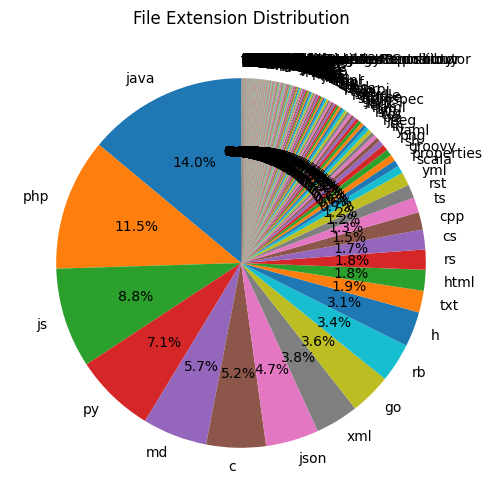

In [19]:
import matplotlib.pyplot as plt
from collections import Counter


# Count frequency of each extension
counts = Counter(extensions)
counts = {ext if ext else "none": cnt for ext, cnt in counts.items()}

# Sort by frequency (descending)
sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))

# Prepare data
labels = list(sorted_counts.keys())
sizes = list(sorted_counts.values())

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("File Extension Distribution")
plt.show()

### Random

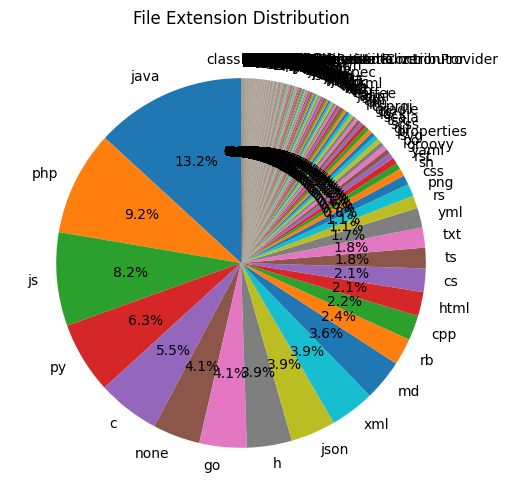

In [14]:
import matplotlib.pyplot as plt
from collections import Counter


# Count frequency of each extension
counts = Counter(extensions)
counts = {ext if ext else "none": cnt for ext, cnt in counts.items()}

# Sort by frequency (descending)
sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))

# Prepare data
labels = list(sorted_counts.keys())
sizes = list(sorted_counts.values())

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("File Extension Distribution")
plt.show()